In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community

Quarterly Dataset

In [3]:
excel_file_path = 'Quarterly_information.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [4]:
# Display the keys (worksheet names) in the dictionary
print("Worksheet names:", list(all_dfs.keys()))

Worksheet names: ['fund_profile', 'fund_profile_merged', 'fund_profile_non_merged', 'investment_performance', 'investment_performance_merged', 'investment_non_merged', 'mysuper_fees', 'mysuper_fees_merged', 'mysuper_fees_non_merged', 'admin_fees', 'admin_fees_merged', 'admin_fees_non_merged', 'activity_fees', 'activity_fees_merged', 'activity_fees_non_merged']


In [5]:
# Access a specific dataframe by its worksheet name
fund_profile_merged = all_dfs['fund_profile_merged']  

In [6]:
# Initialize an empty dictionary to store the mapping
merger_mapping = {}

# Loop through each row in the DataFrame
for index, row in fund_profile_merged.iterrows():
    if row['Merged'] == 1:
        acquirer = row['Acquirer']
        target = row['Fund name']
        
        # If the acquirer is already in the dictionary, append the target to its list
        if acquirer in merger_mapping:
            merger_mapping[acquirer].append(target)
        else:
            # Otherwise, add the acquirer to the dictionary and set its value to a list containing the target
            merger_mapping[acquirer] = [target]

# Print the mapping
for acquirer, targets in merger_mapping.items():
    print(f"{acquirer} has acquired {', '.join(targets)}")
    print('-' * 50)

Prime Super has acquired Health Industry Plan
--------------------------------------------------
Tasplan Superannuation Fund has acquired Quadrant Superannuation Scheme
--------------------------------------------------
Mercer Super Trust has acquired Virgin Superannuation, Retirement Wrap, Retirement Wrap
--------------------------------------------------
equipsuper has acquired Rio Tinto Staff Superannuation Fund, Toyota Super, Boc Gases Superannuation Fund
--------------------------------------------------
Aware Super has acquired Concept One The Industry Superannuation Fund, Victorian Superannuation Fund, WA Local Government Superannuation Plan, The Victorian Independent Schools Superannuation Fund
--------------------------------------------------
Russell Investments Master Trust has acquired Nationwide Superannuation Fund
--------------------------------------------------
Smart Future Trust has acquired The Executive Superannuation Fund
-------------------------------------------

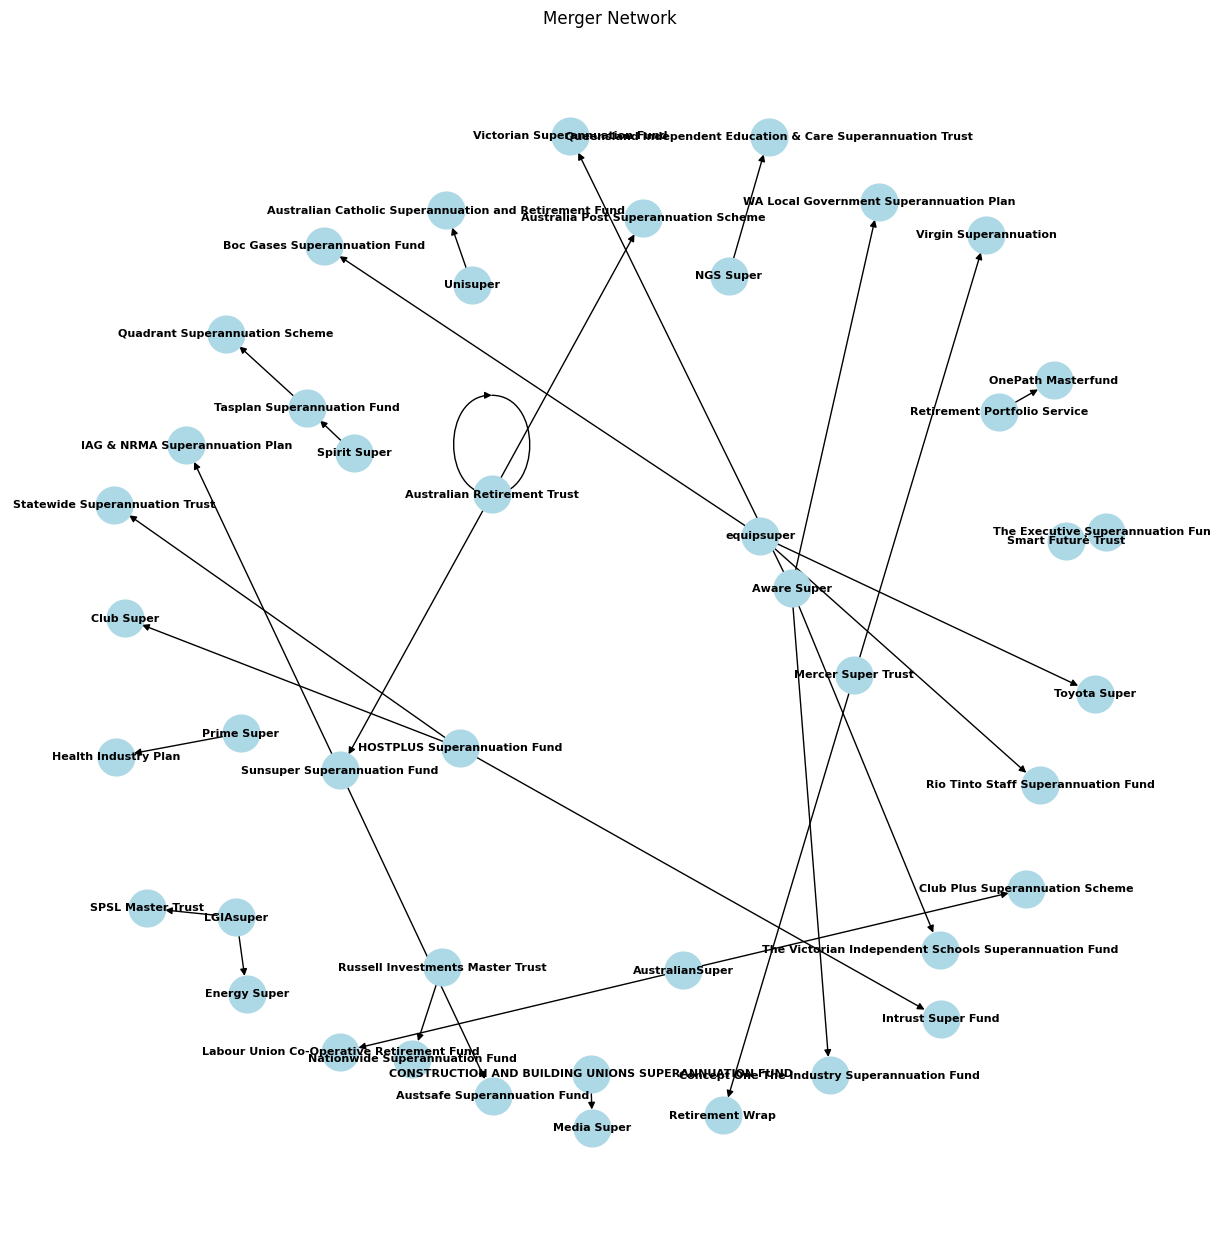

In [6]:
# Initialize a directed graph
G = nx.DiGraph()

# Loop through each row in the DataFrame to add edges to the graph
for index, row in fund_profile_merged.iterrows():
    if row['Merged'] == 1:
        acquirer = row['Acquirer']
        target = row['Fund name']
        
        # Add an edge from acquirer to target
        G.add_edge(acquirer, target)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=8, font_color="black", node_size=700, font_weight="bold", arrows=True)
plt.title("Merger Network")
plt.show()

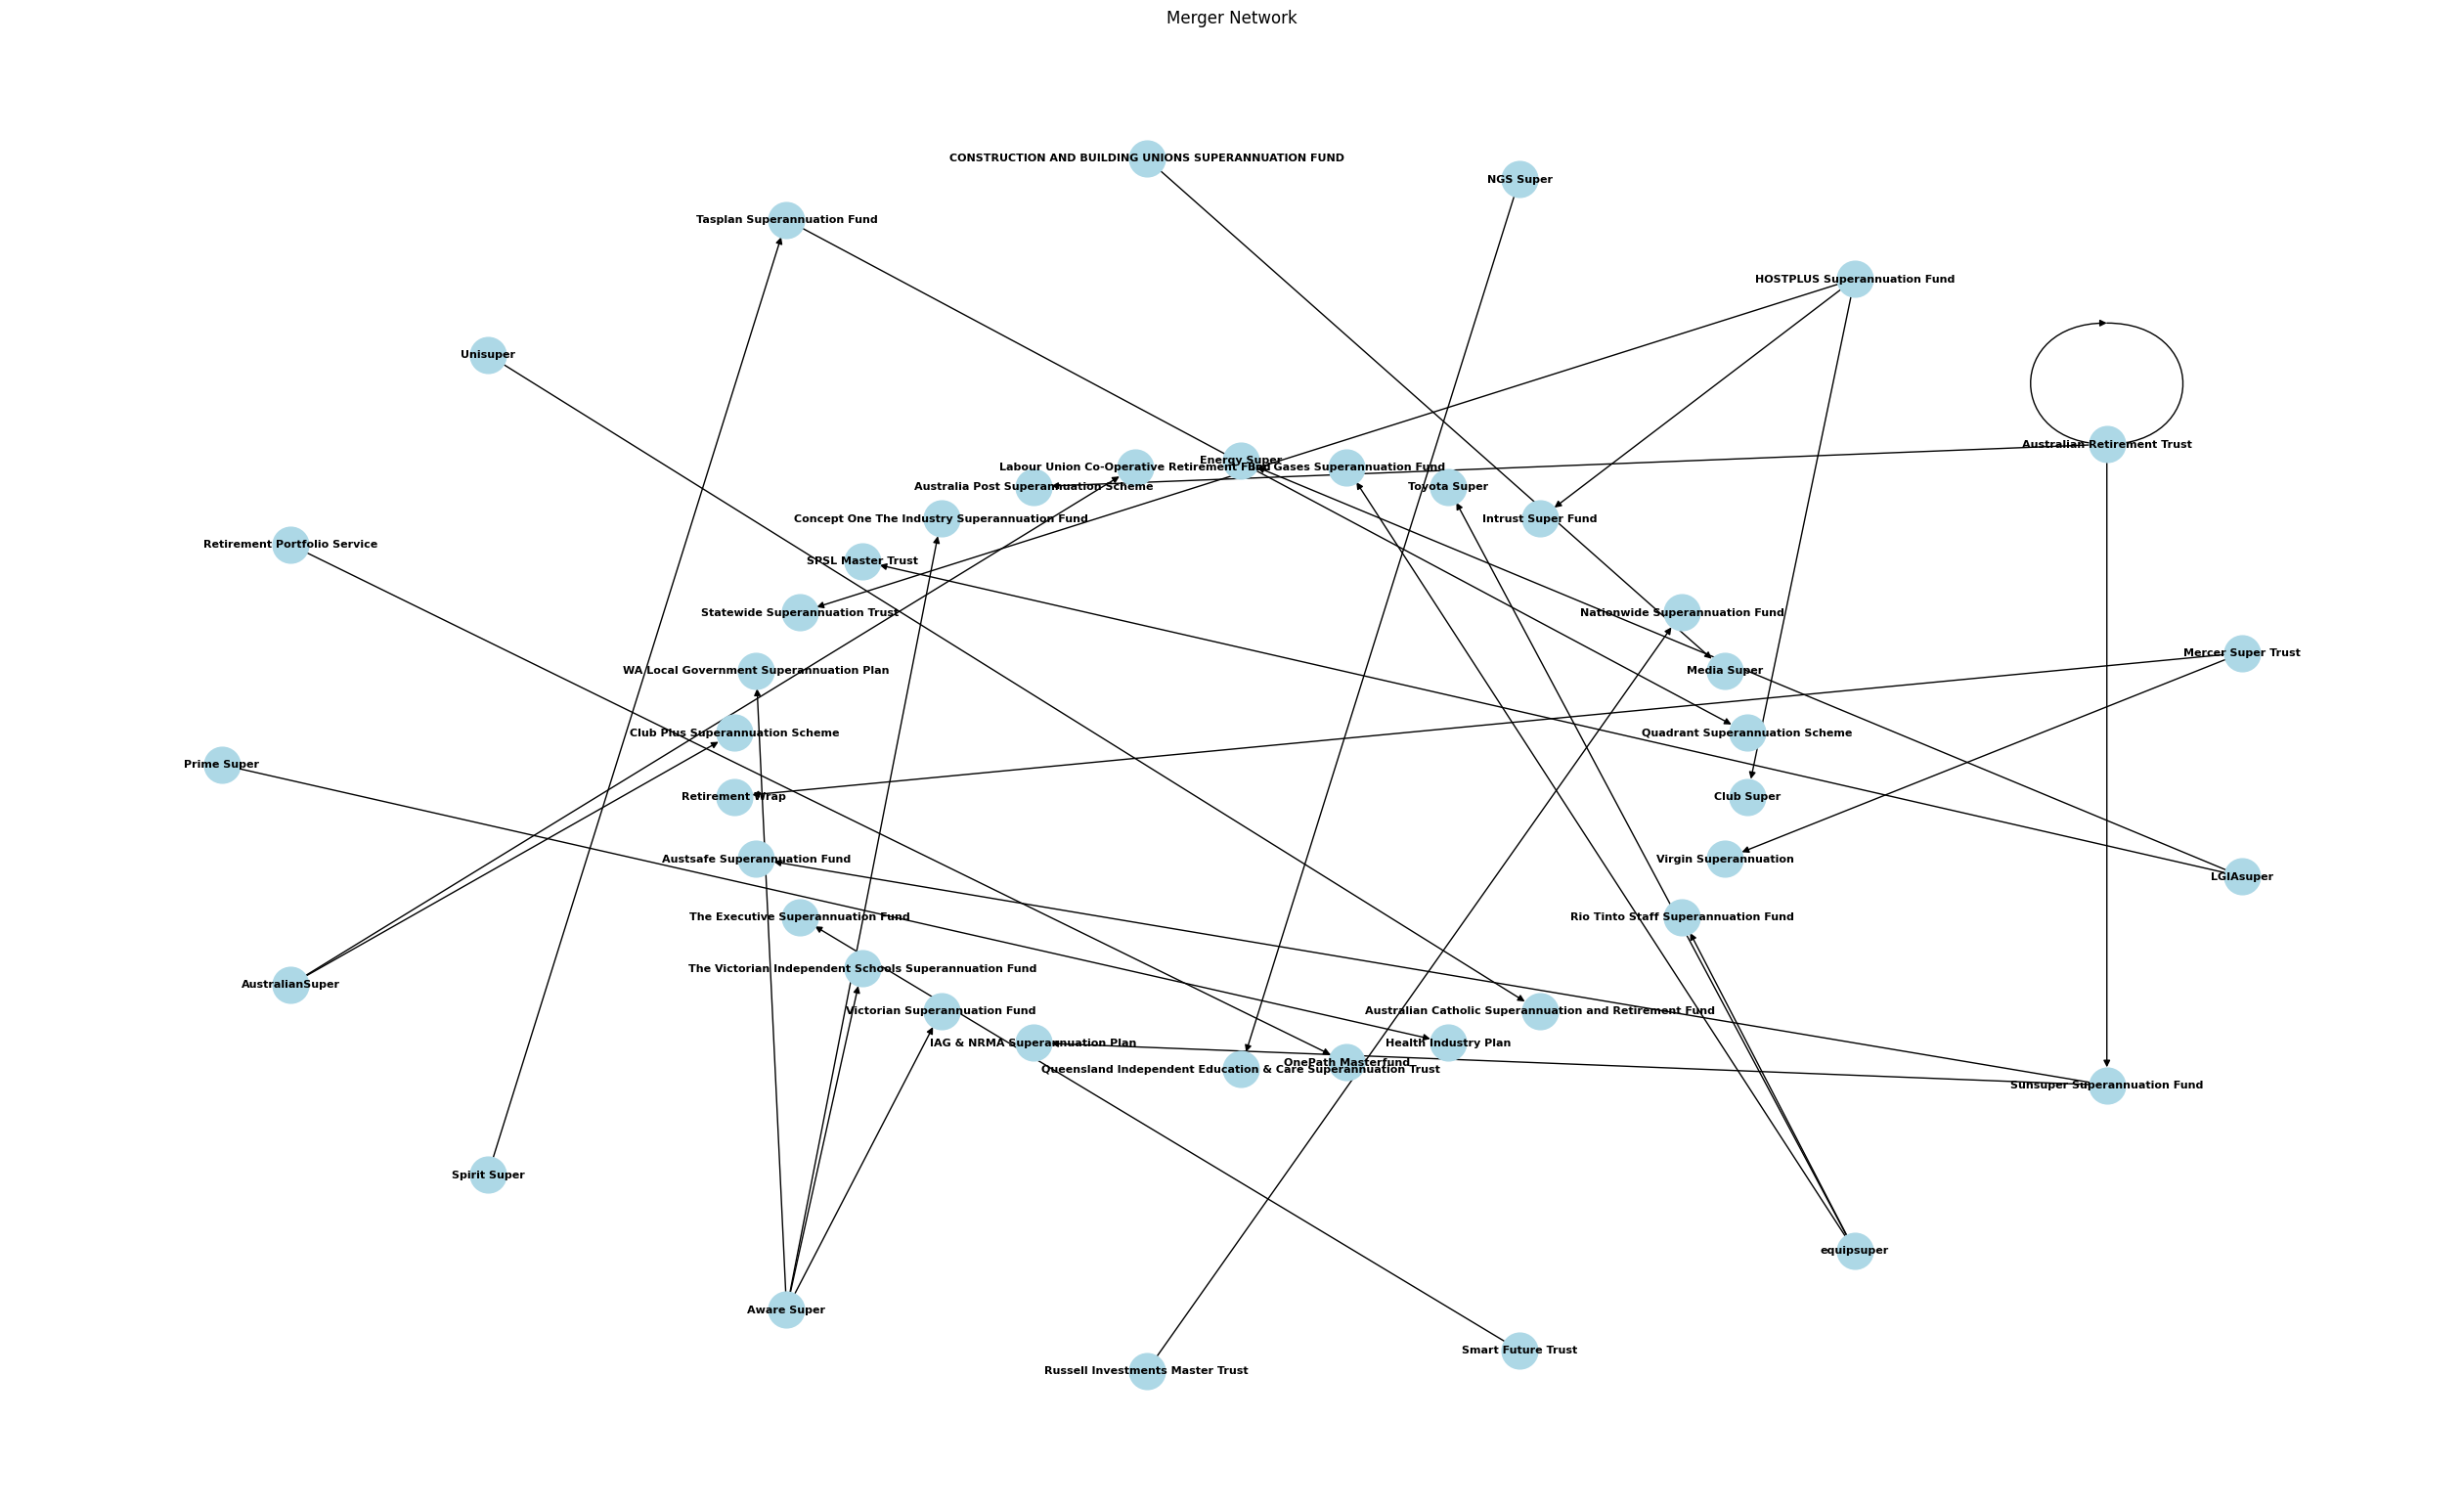

In [13]:
# Initialize a directed graph
G = nx.DiGraph()

# Loop through each row in the DataFrame to add edges to the graph
for index, row in fund_profile_merged.iterrows():
    if row['Merged'] == 1:
        acquirer = row['Acquirer']
        target = row['Fund name']
        
        # Add an edge from acquirer to target
        G.add_edge(acquirer, target)

# Create a list of shells (each shell is a list of nodes)
shells = []
acquirers = set([edge[0] for edge in G.edges()])  # All unique acquirers
targets = set([edge[1] for edge in G.edges()])  # All unique targets

# Add acquirers and targets to shells
shells.append(list(targets))
shells.append(list(acquirers))

# Draw the graph
plt.figure(figsize=(25, 15))

# Use shell layout for positioning
pos = nx.shell_layout(G, shells)

# Draw the graph with arrows
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=8, font_color="black", node_size=700, font_weight="bold", arrows=True)

plt.title("Merger Network")
plt.show()